# **Memvisualisasikan Expected Value**
Bayangkan kalian memiliki sebuah dadu yang adil. Kalian mencoba untuk melempar dadu tersebut 10 kali, dan hasil yang kalian dapatkan adalah sebagai berikut

In [0]:
print(c(1,6,1,3,5,5,4,6,3,3))

 [1] 1 6 1 3 5 5 4 6 3 3


Dari hasil pelemparan ini, berapa rata-rata angka yang kita dapat? Kita dapat menghitung dengan cara seperti ini

$$
\bar{x}=\frac{2(1)+3(3)+1(4)+2(5)+2(6)}{10} \\ = \frac{2}{10}(1)+\frac{3}{10}(3)+\frac{1}{10}(4)+\frac{2}{10}(5)+\frac{2}{10}(6) \\ = 3.7
$$

Perhatikan bahwa di setiap angka dadu yang muncul, kita memberikan **bobot** karena frekuensi kemunculan tiap mata dadu yang berbeda-beda. Dari perhitungan ini, kita dapat mengetahui rata-rata jumlah angka dadu yang kita dapatkan dalam 10 kali pelemparan adalah 3.7. Pertanyaan selanjutnya, bagaimana jika kita melakukan lebih banyak pelemparan? Dari sinilah kita mengenal istilah Expected Value.


---


Expected Value merupakan ukuran central tendency dari suatu kejadian peubah acak. Expected Value dihitung dengan menggunakan rata-rata tertimbang seperti contoh di atas. Perbedaannya, alih-alih menggunakan frekuensi relatif sebagai bobot, kita menggunakan **peluang** sebagai bobot dari tiap nilai (peubah acak/random variable)
$$E(X) = \frac{1}{6}(1+2+3+4+5+6) = 3.5$$
Expected value dapat direpresentasikan secara matematis dengan rumus umum berikut:
$$E(X) = \sum_{i=1}^{n} X_iP(X_i) = X_1P(X_1)+X_2P(X_2)+...X_nP(X_n)$$
Namun bagaimana kita dapat membayangkan angka 3.5 yang kita dapat secara intuitif? Pada kasus di atas, Expected Value ternyata juga menunjukan rata-rata aritmatik dari jumlah angka dadu yang kita dapat apabila kita melakukan pelemparan dadu secara berulang-ulang hingga tak terhingga banyaknya. Karena mengocok dadu sampai ratusan kali adalah hal yang melelahkan, kita dapat melakukan simulasi melalui RStudio. 


## Contoh Kasus: Income from Sales Jobs
Kita diberikan dua pilihan, mengambil Job 1 menjadi seorang komisioner, dengan peluang 50% mendapatkan \$2000 serta 50% mendapatkan \$1000. Atau mengambil Job 2 menjadi seorang yang berpendapatan tetap, dengan peluang 99% mendapatkan \$1510 serta 1% mendapatkan \$510. Pilihan mana yang sebaiknya kita pilih?
Salah satu cara yang dipakai adalah menghitung Expected Value dari kedua Job, dan kalian akan menemukan angka 1500 pada kedua perhitungan. Dari sini kita dapat menyimpulkan bahwa rata-rata pendapatan yang kita dapat adalah $1500 untuk kedua pekerjaan. Lantas, pekerjaan mana yang sebaiknya dipilih?

## Sebuah Simulasi
Mempertimbangkan pilihan Job 1 sebagai komisioner. Anggap saja, pendapatannya didapat tiap bulan. Semisal kita mencoba mengikuti Job 1 selama 12 bulan, apa hasilnnya?

In [0]:
#Generate random number
pendapatan<-sample(c(1000,2000),12,replace=T,prob=c(0.5,0.5))
pendapatan

[1] 1000 1000 2000 1000 2000 2000 2000 1000 2000 2000 1000 2000

Dari simulasi Job 1 selama 12 bulan, kita mendapatkan hasil di atas. Dan kita dapat menghitung rata-ratanya

In [0]:
mean(pendapatan)

[1] 1583.333

Angka ini memang cukup dekat dengan \$1500, estimasi kita yang sebelumnya. Tapi mungkin kita masih kurang yakin, jadi bagaimana jika kita mensimulasikan Job 1 selama **1000 bulan** (1000 percobaan)?? Tentu kita dapat melakukan itu dengan R dan for loop.

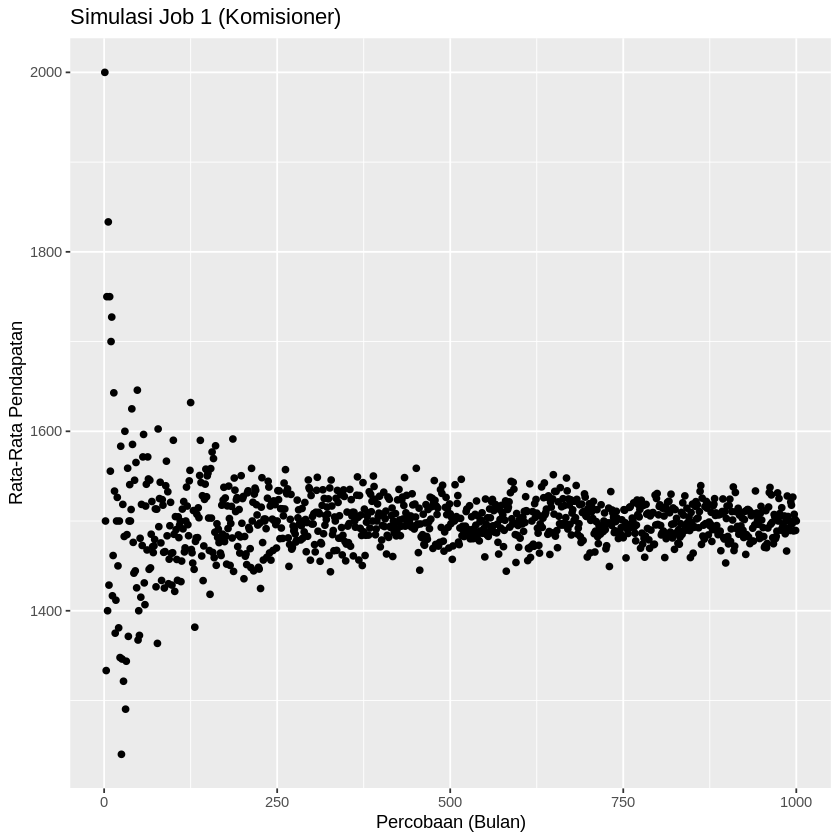

In [0]:
Job1<-c()
for(i in 1:1000){
  Job1[i]<-mean(sample(c(2000,1000),i,replace=T,prob=c(0.5,0.5)))
}
#x merupakan vektor jumlah bulan simulasi dengan Job1
x<-1:1000
tabel<-data.frame(x,Job1)
library(ggplot2)
plot_job1<-ggplot(tabel,aes(x,Job1))+
  geom_point()+
  labs(title='Simulasi Job 1 (Komisioner)')+
  ylab('Rata-Rata Pendapatan')+
  xlab('Percobaan (Bulan)')
plot_job1

Ternyata, semakin kita menambah jumlah eksperimen kita (simulasi jumlah bulan dengan Job1), kita dapat mengetahui ternyata rata-rata aritmatik pendapatan kita akan semakin mendekati angka \$1500, Expected Value yang kita temukan sebelumnya. 
Kita dapat mencoba hal ini pada Job2

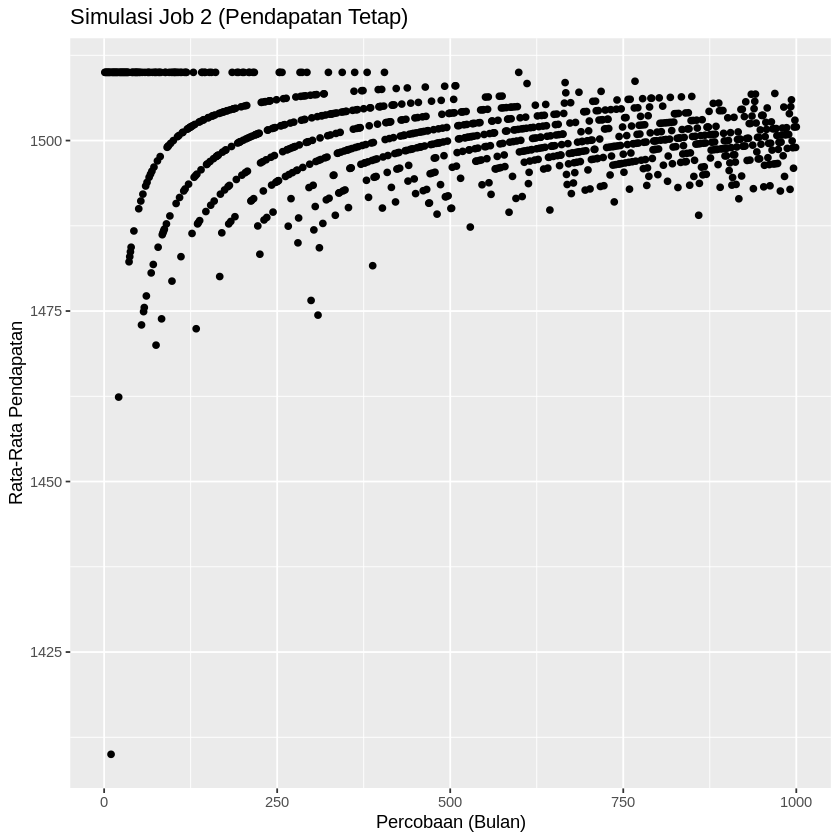

In [0]:
Job2<-c()
for(i in 1:1000){
  Job2[i]<-mean(sample(c(1510,510),i,replace=T,prob=c(0.99,0.01)))
}
tabel<-data.frame(x,Job2,Job1)
plot_job2<-ggplot(tabel,aes(x,Job2))+
  geom_point()+
  labs(title='Simulasi Job 2 (Pendapatan Tetap)')+
  ylab('Rata-Rata Pendapatan')+
  xlab('Percobaan (Bulan)')
plot_job2

Ternyata, rata-rata aritmatik dari pendapatan Job 2 juga  semakin mendekati Expected Value-nya, $1500. Lalu Job mana yang harusnya kita pilih? Untuk menjawab pertanyaan tersebut, kita perlu melihat kedua simulasi kedalam satu gambar.

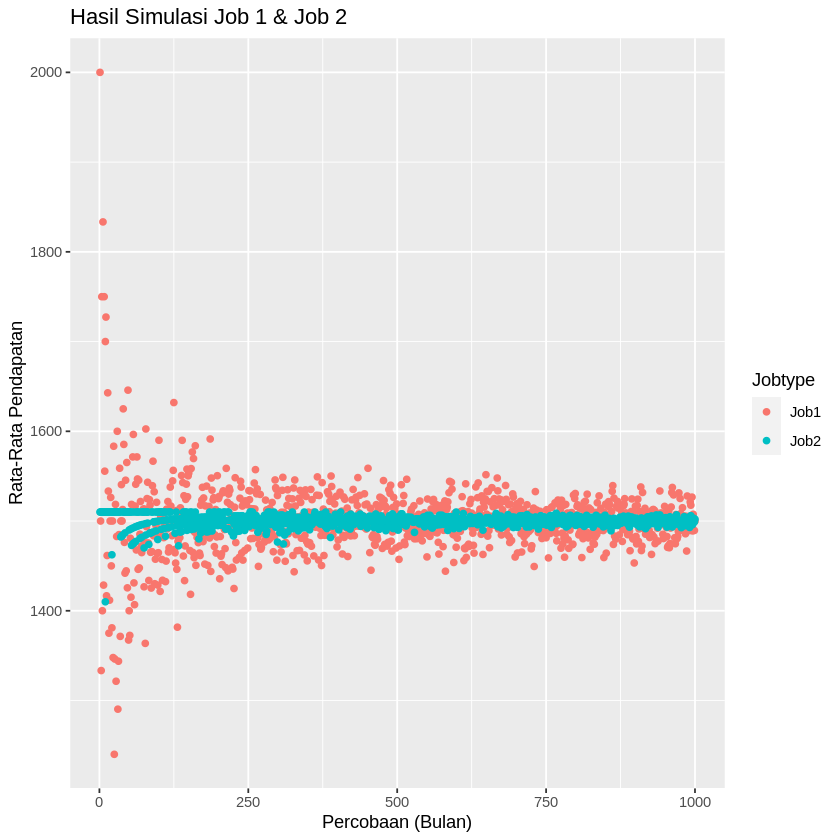

In [0]:
library(tidyr)
tabel2<-tabel %>% 
  gather('Job1','Job2',key='Jobtype',value='ExpValue')
ggplot(tabel2,aes(x,ExpValue,colour=Jobtype))+
  geom_point()+
  labs(title='Hasil Simulasi Job 1 & Job 2')+
  xlab('Percobaan (Bulan)')+
  ylab('Rata-Rata Pendapatan')

Ternyata setelah melihat gambar di atas, kita mengetahui bahwa walaupun Job 1 dan Job 2 sama-sama mendekati rata-rata pendapatan yang sama (\$1500), kedua Job memiliki variabilitas yang berbeda. Job 2 terlihat lebih stabil daripada Job 1, namun bagaimana cara mengukurnya secara matematis? Salah satu ukuran variabilitas yang paling sering dipakai adalah standar deviasi. Standar deviasi atau simpangan baku dapat dihitung menggunakan rumus berikut
$$\sigma=\sqrt{\frac{\sum_{i=1}^{N}(x_i-\bar{x})^2}{N}}$$
atau
$$\sigma=\sqrt{E(X^2)-[E(X)]^2}$$
Apabila kita menghitung standar deviasi untuk kedua Job, kita akan menemukan angka 500 untuk Job 1 dan 99.50 untuk Job 2. Standar deviasi atau simpangan baku merepresentasikan jarak setiap titik data dengan rata-rata data tersebut. Oleh karena itu, semakin besar nilai dari standar deviasi, semakin berisiko suatu pilihan.

## Law of Large Numbers dan Central Limit Theorem
Melalui simulasi sebelumnya, kita mengetahui ternyata semakin kita menambah jumlah eksperimen (atau sampel) kita, rata-rata aritmatik dari percobaan kita akan semakin mendekati nilai Expected Value yang kita hitung sebelumnya. Di dalam ilmu Statistika, hal ini disebut **Law of Large Numbers**.
Disamping hal tersebut, kita juga menemukan bahwa rata-rata dari hasil eksperimen kita akan membentuk distribusi normal. Hal ini disebut **Central Limit Theorem**

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


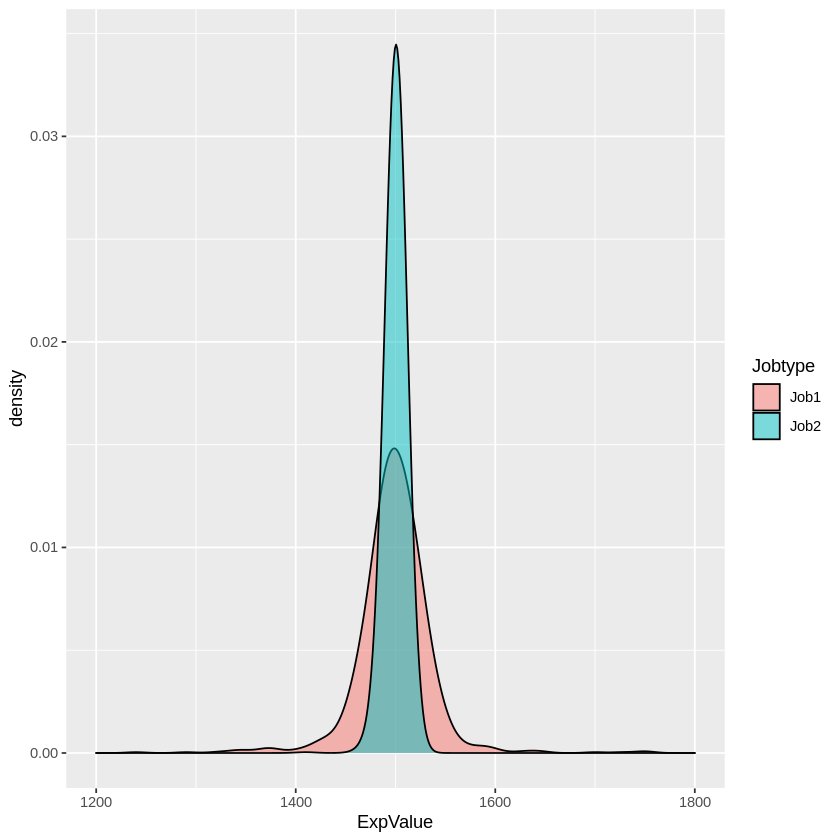

In [0]:
ggplot(tabel2,aes(x=ExpValue,fill=Jobtype))+
  geom_density(alpha=0.5,bw=10)+
  xlim(1200,1800)

Melalui dua kurva distribusi normal di atas, kita dapat melihat ternyata selang kepercayaan Job 2 lebih sempit daripada Job 1. Selang kepercayaan merupakan interval rata-rata sampel berhasil mengestimasi rata-rata populasi. Umumnya selang kepercayaan yang sering dipakai adalah 95% ,yang dapat dihitung melalui rumus
$$
CI_{\mu} = \bar{x} \ \pm 1.96(SE)
$$
SE merupakan standard error, standar deviasi dari 1000 sampel rata-rata kita. SE menunjukan seberapa tersebar rata-rata sampel kita dengan rata-rata populasi (Expected Value). SE dapat dihitung secara langsung dengan menggunakan



In [0]:
#Standard Error
library(dplyr)
tabel2 %>% 
  group_by(Jobtype) %>% 
  summarize(sd=sd(ExpValue))

Jobtype,sd
<chr>,<dbl>
Job1,41.752156
Job2,6.886411


Sehingga selang kepercayaan Job 1 adalah
$$
CI_{Job1}= 1500\ \pm 1.96(41.75)=[1418,1582]
$$
Artinya, 95% dari ekperimen kita akan memiliki rata-rata outcome sekitar 1418 dollar sampai 1582 dollar.
Dan selang kepercayaan Job 2 adalah
$$
CI_{Job2}= 1500\ \pm 1.96(6.88)=[1487,1513]
$$
Artinya, 95% dari eksperimen kita akan memiliki rata-rata outcome 1487 dollar sampai 1513 dollar.

## Kesimpulan
Kita tidak dapat menyimpulkan suatu pilihan secara cepat hanya dengan melihat ukuran central tendency (yang mana merupakan Expected Value dalam kasus ini). Kita tentu perlu memperhatikan risiko dari setiap pilihan yang tersedia dengan cara menghitung ukuran variability (yang mana merupakan standar deviasi dalam kasus ini). Setelah mengetahui rincian dari kedua pilihan di atas, profil risiko kita akan menjadi penentu pilihan kita. Apabila kita merupakan seorang pecinta risiko, job yang dapat kita pilih adalah Job 1. Apabila kita tidak menyukai risiko, job yang dapat kita pilih adalah Job 2.